<a href="https://colab.research.google.com/github/VedantWani/Swarm-Intelligence/blob/master/Opposition_Based_Optimization_Artificial_Bee_Colony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy.random

In [0]:
def CostFunction(position):
  total = 0
  
  for i in range(len(position)):
    total+=position[i]**2
  return total
  #return (position[0] - 0.1)**2 + (position[1] - 2)**2;


In [0]:
def fitness(cost):
  fit = cost
  if fit < 0:
      fit = 1 + abs(fit)
  else:
      fit = 1/(1+fit)


  return fit



In [0]:
def Selection_roulette(fitness):
  P = fitness/sum(fitness)

  rand = np.random.rand()
  cummulsum = np.cumsum(P)

  sh = np.argwhere(rand<=cummulsum)
  random.shuffle(sh)
  
  return random.choice(sh)[0]

   

In [0]:
cummulsum = np.cumsum([0.1,0.2,0.3,0.4])

np.argwhere(0.19<=cummulsum)
sh =np.argwhere(0.09<=cummulsum)
random.shuffle(sh)
random.choice(sh)[0]

1

In [0]:
def BunchPosition():
  tx.append(Swarm[i].position[0])
  ty.append(Swarm[i].position[1])
  tz.append(Swarm[i].position[2])

def updatePosition(tx, ty, tz):
  xs.append(np.array(tx))
  ys.append(np.array(ty))
  zs.append(np.array(tz))
 

In [0]:
  class Bee:
    pass

In [0]:
BestSolution = []

In [0]:
gBest = Bee()

In [0]:
gBest.cost = float('inf')

In [0]:
#problem definition


#Dim = 5
varsize = 3

DimMin = -100
DimMax = 100

In [0]:
#PSO Parameters
swarm_size = 100
max_iter = 100
limit = 100

In [0]:
#initialization of swarm
xs = []
ys = []
zs = []
tx = []
ty = []
tz = []

Swarm = []
OSwarm = []   #opposite solutions 
 
for i in range(swarm_size):
  bee = Bee()
  onewbee = Bee() #opposite solution

  bee.position = np.random.uniform(DimMin, DimMax, varsize)
  
  onewbee.position = DimMin + DimMax - bee.position #opposit

  #costfunction
  bee.cost = CostFunction(bee.position)
  onewbee.cost = CostFunction(onewbee.position)
  
   #update global
  if bee.cost < onewbee.cost:
    if bee.cost < gBest.cost:
      gBest.cost = bee.cost
      gBest.position = bee.position
  else:
     if onewbee.cost < gBest.cost:
      gBest.cost = onewbee.cost
      gBest.position = onewbee.position
  
  Swarm.append(bee)
  BunchPosition()
updatePosition(tx, ty, tz)
tx,ty,tz = [],[],[]



AC = np.zeros((swarm_size,1))




In [0]:
for it in range(0,max_iter):
  for i in range(0, swarm_size):
    
    #employeed Bee Phase
    randk = list(range(swarm_size))
    randk.remove(i)
    random.shuffle(randk)
    k = random.choice(randk)

    phi = np.random.uniform(-1, 1, varsize)
   

    newbee = Bee()
    #position update
    newbee.position = Swarm[i].position + phi * (Swarm[i].position - Swarm[k].position)

    #opposite solution
    onewbee = Bee()
    onewbee.position = DimMin + DimMax - newbee.position
    #OSwarm.append(onewbee)



    #fitness calculation

    #evaluate fitness
    Swarm[i].cost = CostFunction(Swarm[i].position)
    newbee.cost = CostFunction(newbee.position)


   # OSwarm[i].cost = CostFunction(OSwarm[i].position)
    onewbee.cost = CostFunction(onewbee.position)
    

    beeCurrfitness = fitness(Swarm[i].cost)
    newbeefitness = fitness(newbee.cost)
    onewbeefitness = fitness(onewbee.cost)
    #greedy selection using fitness and not by cost
   
    if newbeefitness >= onewbeefitness:
      if newbeefitness >= beeCurrfitness:
        Swarm[i].cost = newbee.cost
        Swarm[i].position = newbee.position
        #print(newbee.cost)
      else:
        AC[i] += 1
    else:
      if onewbeefitness >= beeCurrfitness:
        Swarm[i].cost = newbee.cost
        Swarm[i].position = newbee.position
      else:
        AC[i] += 1

    BunchPosition()
  updatePosition(tx, ty, tz)
  tx,ty,tz = [],[],[]

    
  
  #fitness and probabli

  fit = []
  for i in range(0, swarm_size):
    fit.append(fitness(Swarm[i].cost))
  
  
  
 

  #onlooker bee phase
  
  for i in range(0,swarm_size):
    
    selectedBee = Selection_roulette(fit)

    randk = list(range(swarm_size))
    randk.remove(selectedBee)
    random.shuffle(randk)
    k = random.choice(randk)

    phi = np.random.uniform(-1, 1, varsize)
   

    newbee = Bee()
    #position update
    newbee.position = Swarm[selectedBee].position + phi * (Swarm[selectedBee].position - Swarm[k].position)

    #opposite solution
    onewbee = Bee()
    onewbee.position = DimMin + DimMax - newbee.position

    #fitness calculation

    #valuate fitness
    Swarm[selectedBee].cost = CostFunction(Swarm[selectedBee].position)
    newbee.cost = CostFunction(newbee.position)
    onewbee.cost = CostFunction(onewbee.position)

    beeCurrfitness = fitness(Swarm[selectedBee].cost)
    newbeefitness = fitness(newbee.cost)
    onewbeefitness = fitness(onewbee.cost)
    
    
    #greedy selection using fitness and not by cost
    if newbeefitness >= onewbeefitness:
      if newbeefitness >= beeCurrfitness:
        Swarm[selectedBee].cost = newbee.cost
        Swarm[selectedBee].position = newbee.position
      else:
        AC[selectedBee] += 1
    else:
      if newbeefitness >= beeCurrfitness:
        Swarm[selectedBee].cost = newbee.cost
        Swarm[selectedBee].position = newbee.position
      else:
        AC[selectedBee] += 1
    BunchPosition()
  updatePosition(tx, ty, tz)
  tx,ty,tz = [],[],[]
      

 #SCout BEe
  for i in range(0, swarm_size):
    if AC[i] >= limit:
      Swarm[i].position = np.random.uniform(DimMin, DimMax, varsize)
      #costfunction
      Swarm[i].cost = CostFunction(bee.position)

      AC[i] = 0
    BunchPosition()
  updatePosition(tx, ty, tz)
  tx,ty,tz = [],[],[]

  
  for i in range(0, swarm_size):
    if Swarm[i].cost < gBest.cost:
      gBest.cost = Swarm[i].cost
      gBest.position = Swarm[i].position
    
    
  #xs[i].append(Swarm[i].position[0])
  
  
  BestSolution.append(gBest.cost)
  print("Iteration : " +str(it)+" Best COst: "+str(gBest.cost))


Iteration : 0 Best COst: 462.946361629588
Iteration : 1 Best COst: 17.024127937513974
Iteration : 2 Best COst: 17.024127937513974
Iteration : 3 Best COst: 6.8907459905974555
Iteration : 4 Best COst: 6.8907459905974555
Iteration : 5 Best COst: 2.4402652744281323
Iteration : 6 Best COst: 1.871526192289458
Iteration : 7 Best COst: 1.7576018896509624
Iteration : 8 Best COst: 0.32139743296763706
Iteration : 9 Best COst: 0.017654978994460998
Iteration : 10 Best COst: 0.017654978994460998
Iteration : 11 Best COst: 0.017654978994460998
Iteration : 12 Best COst: 0.017654978994460998
Iteration : 13 Best COst: 0.017654978994460998
Iteration : 14 Best COst: 0.017654978994460998
Iteration : 15 Best COst: 0.017654978994460998
Iteration : 16 Best COst: 0.017654978994460998
Iteration : 17 Best COst: 9.647091183258982e-05
Iteration : 18 Best COst: 9.647091183258982e-05
Iteration : 19 Best COst: 9.647091183258982e-05
Iteration : 20 Best COst: 9.647091183258982e-05
Iteration : 21 Best COst: 9.64709118325

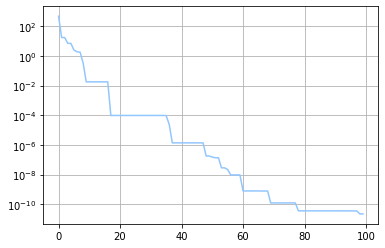

In [0]:

plt.grid()
plt.yscale("log")
plt.plot(BestSolution)

In [0]:
gBest.position

array([-1.69372091e-06,  4.43503692e-06,  8.78282171e-08])

In [0]:
gBest.cost

2.2545956800093637e-11

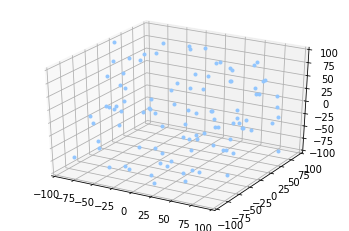

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], "o", markersize=3)
def update(ifrm, xa, ya, za):
    #print(ifrm)
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_zlim(-100,100)
ani = animation.FuncAnimation(fig, update, frames=100, fargs=(xs,ys,zs), interval = 100)
HTML(ani.to_html5_video())